# Context:

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data.
This is a transactional data set that contains all the transactions occurring in online retail.
Ecommerce data is information relating to the visitors and performance of an online shop. It's mostly used by marketers e.g. in understanding consumer behavior and enhancing conversion funnels.

# Objective:

The objective is to find out the features which have the most information context to differentiate the positive class and negative class and also build a model to predict whether a customer will buy a product or not.

# Dataset

The data contains information on web sessions of a customer:

--------------------------------------
- **"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"**: These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.
--------------------------------------
- The **"Bounce Rate", "Exit Rate" and "Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
- **Bounce Rate:** The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

- **Exit Rate:** The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

- Dataset has average bounce rates and exit rates for a page customer landed on.

Read more about **Bounce Rate** vs **Exit Rate** [here](https://support.google.com/analytics/answer/2525491?hl=en&ref_topic=6156780)
- **Page Value:** The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

Read more about **Page Value** [here](https://support.google.com/analytics/answer/2695658?hl=en).

--------------------------------------
- **Special Day:** The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction.
- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
- For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
--------------------------------------
- The dataset also includes the operating system, browser, region, traffic type - these values are masked.

- VisitorType: returning visitor, new visitor, or other types of customer. 
- weekend: a Boolean value indicating whether the date of the visit is weekend or not 
- month: month of the year

### Import the necessary packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
import sklearn
 

### Read the dataset

In [3]:
shoppers = pd.read_csv('online_shoppers_intention.csv')

In [8]:
# copying data to another varaible to avoid any changes to original data
data=shoppers.copy()

### View the first and last 10 rows of the dataset.

In [9]:
data.tail(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.00,0,0.0,6,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,8,4,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.00,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


### Understand the shape of the dataset.

In [10]:
data.shape

(12330, 18)

* Dataset has 12330 rows and 18 columns

### Let's check the duplicate data. And if any, we should remove it.

In [11]:
data[data.duplicated()].count()

Administrative             125
Administrative_Duration    125
Informational              125
Informational_Duration     125
ProductRelated             125
ProductRelated_Duration    125
BounceRates                125
ExitRates                  125
PageValues                 125
SpecialDay                 125
Month                      125
OperatingSystems           125
Browser                    125
Region                     125
TrafficType                125
VisitorType                125
Weekend                    125
Revenue                    125
dtype: int64

### Let's drop the duplicate values. As we can see from above that 125 are duplicates.

In [12]:
data.drop_duplicates(inplace=True)


### Check the data types of the columns for the dataset.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

### Insights:

- Most of the data-types are either **int64** or **float64**.
- 2 columns - Month and VisitorType are having data-types as an **object**, this means we need to convert these into suitable data-type before we feed our data into the model.
- The last two columns: "Weekend" and "Revenue", have the data-type as a **bool**.

### Think about it:

- We already know that we convert the categorical data-types into suitable form using either the "LabelEncoder" or "OneHotEncoding".
- But here we have a **bool** data type. What should we do here?
- In Python, True and False are cast implicitly into integers:

    `True == 1`
    
    `False == 0`
    
    This means that an algorithm running in pure Python should work without conversion.

### Fixing the data types
* Month and VisitorType are of an object type, we can change them to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

In [5]:
data["Month"] = data["Month"].astype("category")
data["VisitorType"] = data["VisitorType"].astype("category")
data.visitorType

NameError: name 'data' is not defined

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  float64 
 10  Month                    12205 non-null  category
 11  OperatingSystems         12205 non-null  int64   
 12  Browser                  12205 non-null  int64   
 13  Region                   12205 non-null  int64   
 14  Traffi

* Month and VisitorType have been converted to categories.

`we can see that the memory usage has decreased from 1.6+ MB to 1.4 MB`

### Check for missing values

In [13]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

* There are no missing values in the data.

### Give a statistical summary for the dataset.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


* All the numerical variables seem to be right-skewed.
* Most time spent by customers is on the ProductRelated pages.
* There are some customers who haven't visited the administrative page and informational pages.

In [ ]:
data.describe(include=['category','bool'])

,Month,VisitorType,Weekend,Revenue
count,12205,12205,12205,12205
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3329,10431,9346,10297


In [ ]:
data['Month'].unique()

['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Categories (10, object): ['Feb', 'Mar', 'May', 'Oct', ..., 'Aug', 'Nov', 'Sep', 'Dec']

In [ ]:
data['VisitorType'].unique()

['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['Returning_Visitor', 'New_Visitor', 'Other']

In [ ]:
data['Weekend'].unique()

array([False,  True])

In [ ]:
data['Revenue'].unique()

array([False,  True])

* Data is of 10 months January and April's data is not available with us.
* In may the website had the most active customers.
* Most of the customers are returning type customers which is a good thing for the business.
* Most traffic on the website is generally on the weekdays.
* Website is only able to generate revenue from a small portion of customers.

### EDA

### Univariate analysis

In [22]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Administrative_Duration

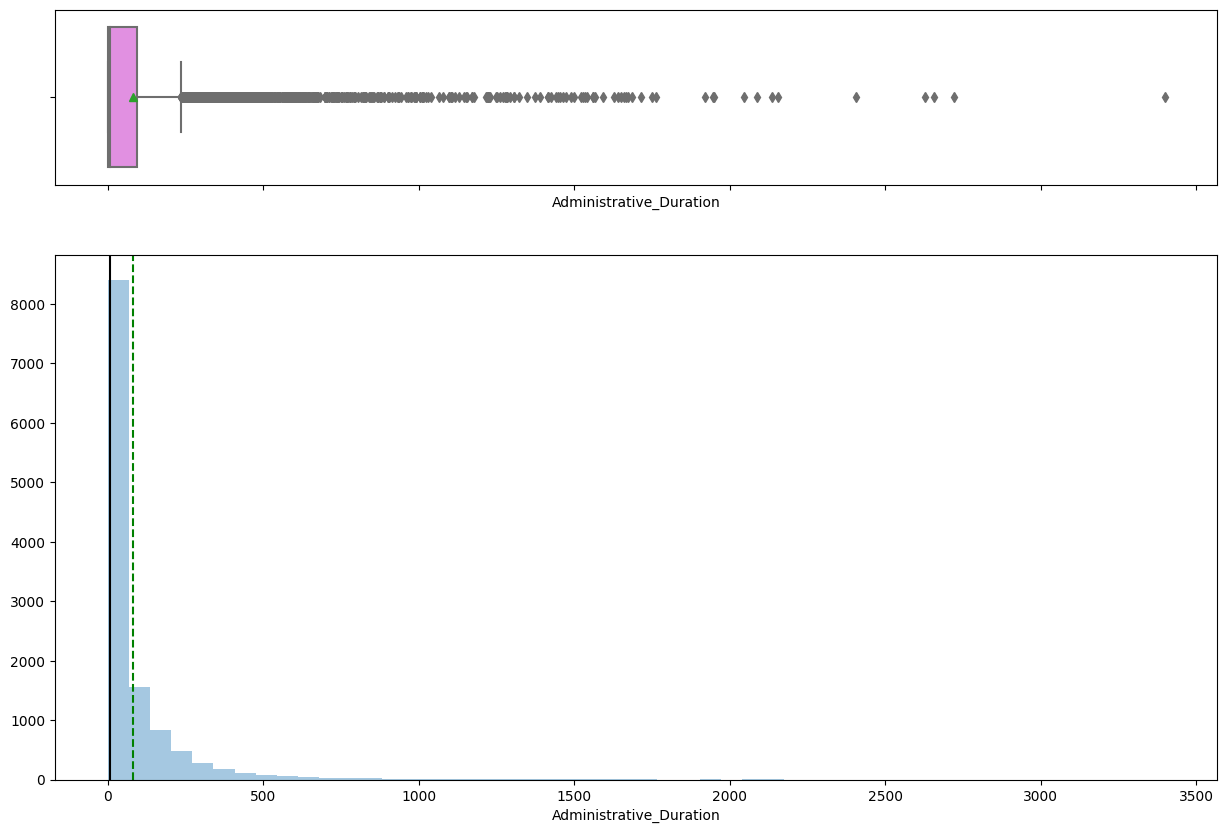

In [23]:
histogram_boxplot(data["Administrative_Duration"])

* The distribution of Administrative_Duration is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 94 which means 75% of customers stay less than 94 seconds on Administrative pages in a session.

### Observations on Informational

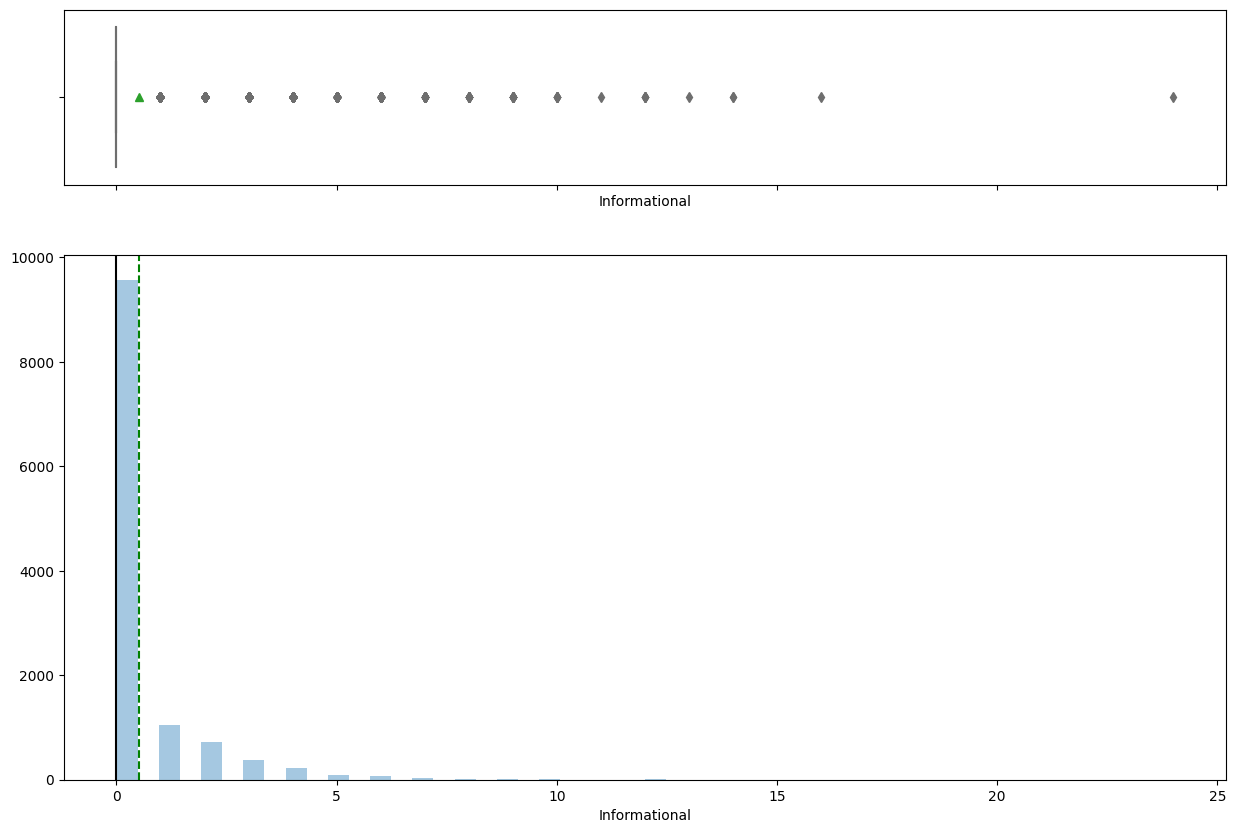

In [24]:
histogram_boxplot(data["Informational"])

* The distribution of Informational is right-skewed.
* There are outliers in this variable.
* Very few customers have visited the informational page.

### Observations on Informational_Duration

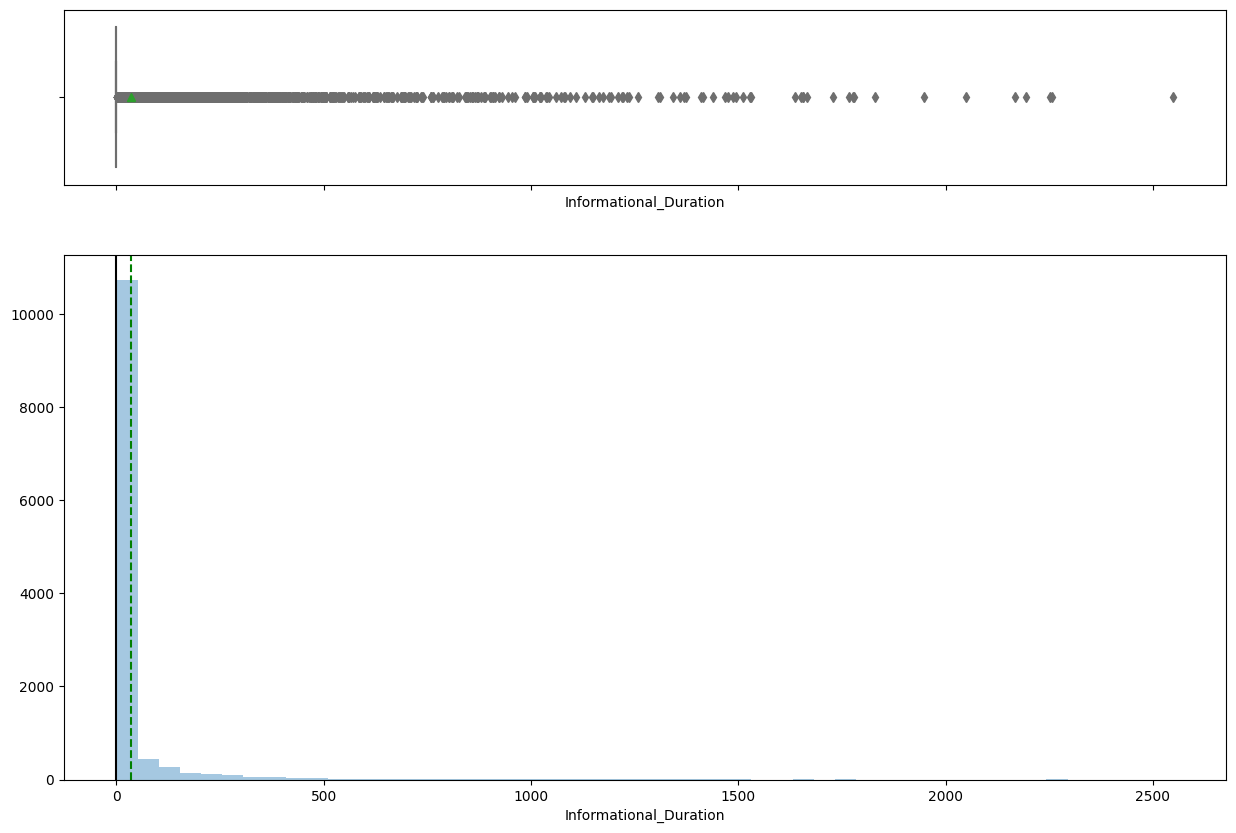

In [25]:
histogram_boxplot(data["Informational_Duration"])

* The distribution of Informational_Duration is right-skewed.
* There are outliers in this variable.
* On average customers have spent 35 seconds on the informational page.

### Observations on ProductRelated

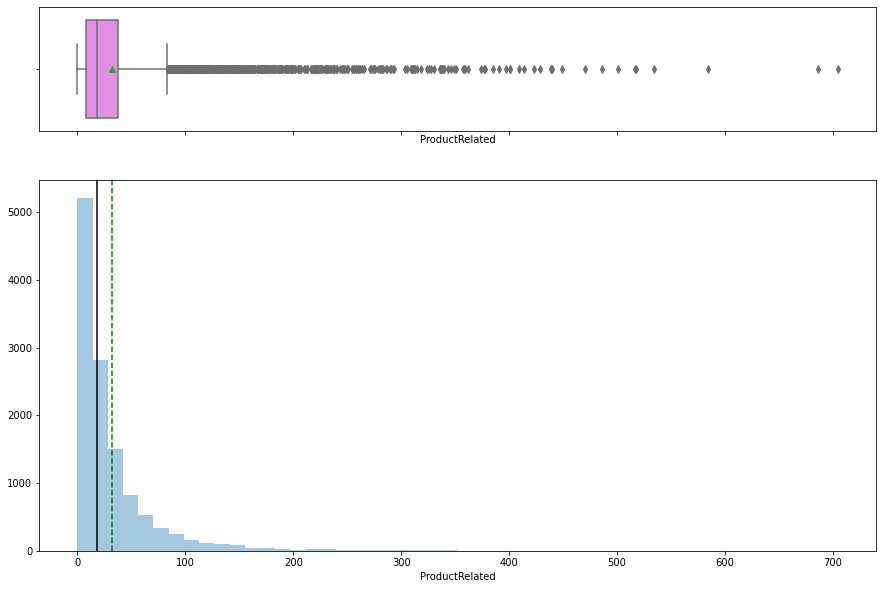

In [ ]:
histogram_boxplot(data["ProductRelated"])

* The distribution of ProductRelated is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 38 which means 75% of customers have visited less than 38 pages and on average a customer visits 32 pages.

### Observations on ProductRelated_Duration

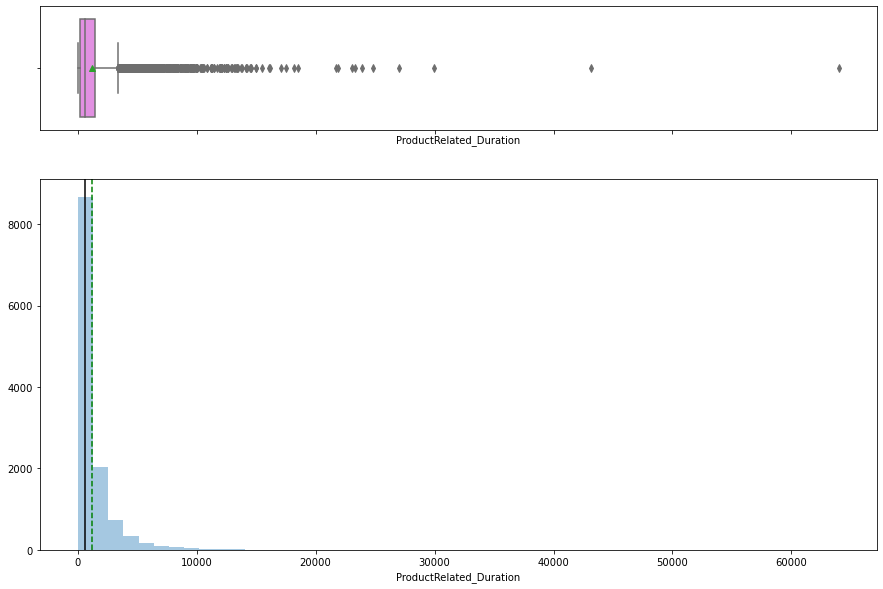

In [ ]:
histogram_boxplot(data["ProductRelated_Duration"])

* The distribution of ProductRelated_Duration is right-skewed.
* There are outliers in this variable.
* On average customers have spent 1206 seconds (~20 minutes) on the ProductRelated page which is way more than the administrative page and informational page.

### Observations on BounceRates

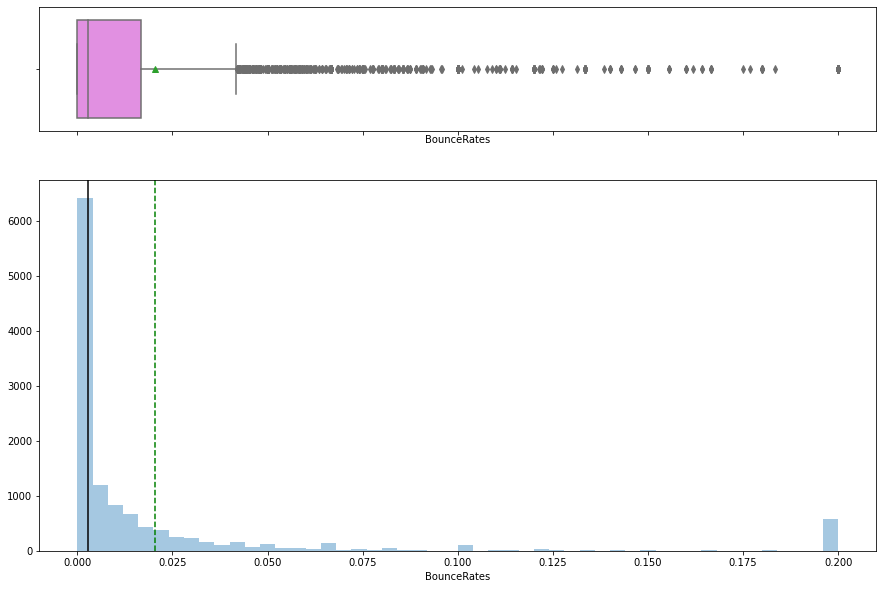

In [ ]:
histogram_boxplot(data["BounceRates"])

* The distribution of BounceRates is right-skewed.
* There are outliers in this variable.
* On average the bounce rate of a webpage is 0.022.

### Observations on ExitRates

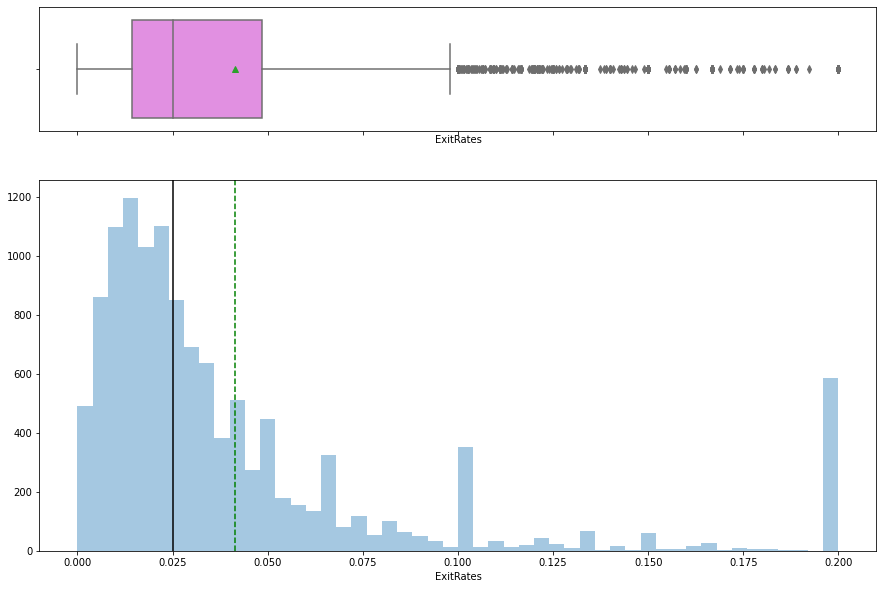

In [ ]:
histogram_boxplot(data["ExitRates"])

* The distribution of ExitRates is right-skewed.
* There are outliers in this variable.
* On average the bounce rate of a webpage is 0.041.

### Observations on PageValues

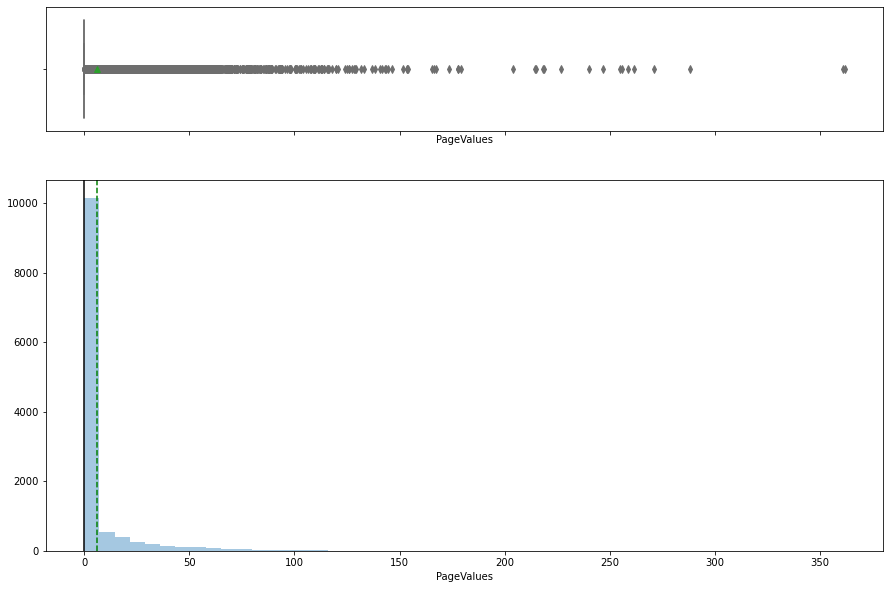

In [ ]:
histogram_boxplot(data["PageValues"])

* The distribution of PageValues is right-skewed.
* There are outliers in this variable.
* On average the customers visit 6 pages before finally landing on the transaction page.

### Observations on SpecialDay

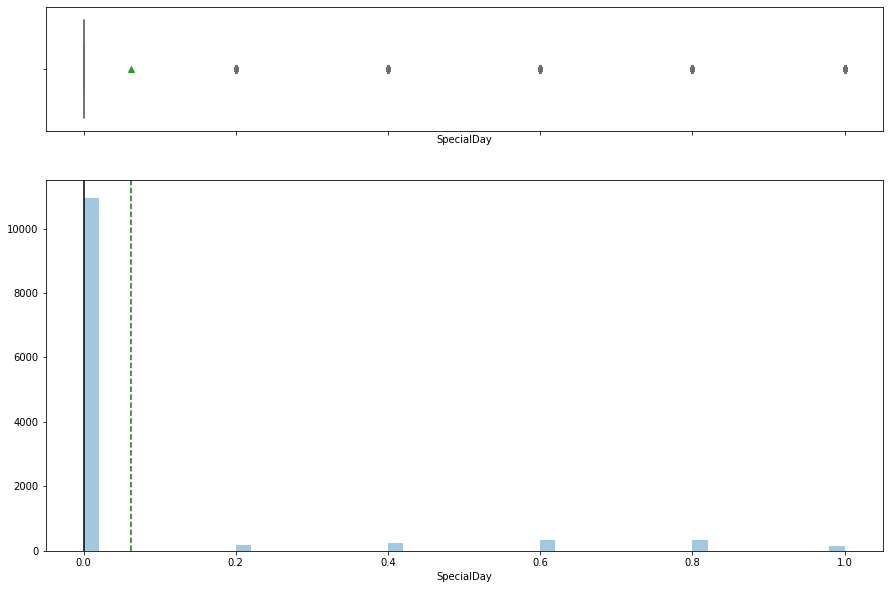

In [ ]:
histogram_boxplot(data["SpecialDay"])

* The distribution of SpecialDays suggests that most customers have visited the website on days which were not close to a special occasion.
* The distribution of SpecialDays also suggests we should look at it as a category to extract more information.

### Observations on OperatingSystems

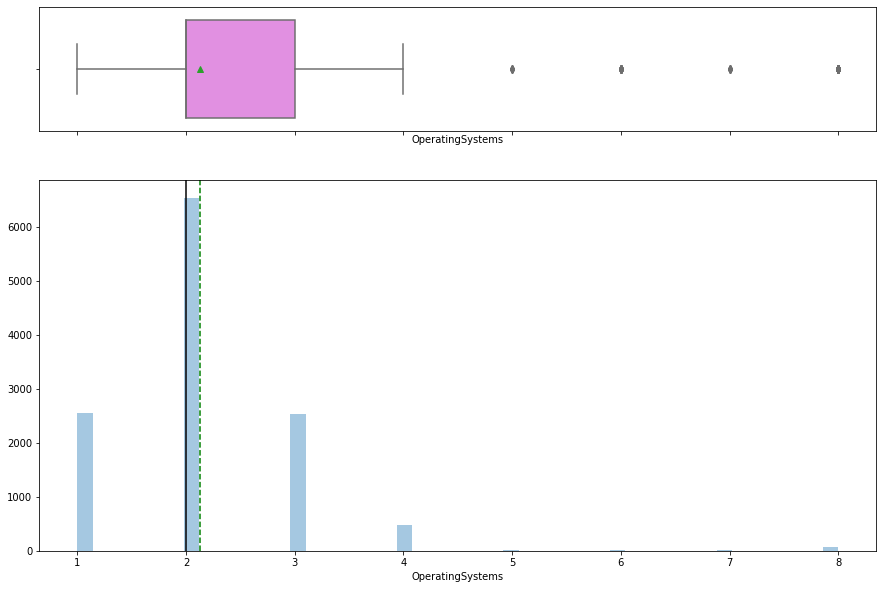

In [ ]:
histogram_boxplot(data["OperatingSystems"])

* The distribution of Operating systems shows most of the customers accessed the website using 2nd operating system. 
* These values are masked so it is difficult to comment on it.
* The distribution of Operating systems also suggests we should look at it as a category to extract more information.

### Observations on Browser

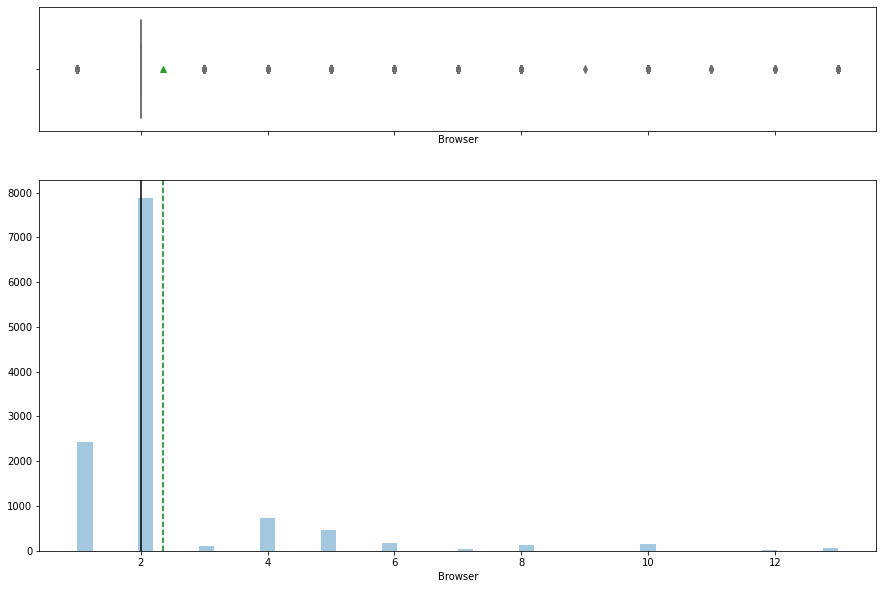

In [ ]:
histogram_boxplot(data["Browser"])

* The distribution of Browser shows most of the customers accessed the website using 2nd browser. 
* These values are masked so it is difficult to comment on it.
* The distribution of Browser also suggests we should look at it as a category to extract more information.

### Observations on Region

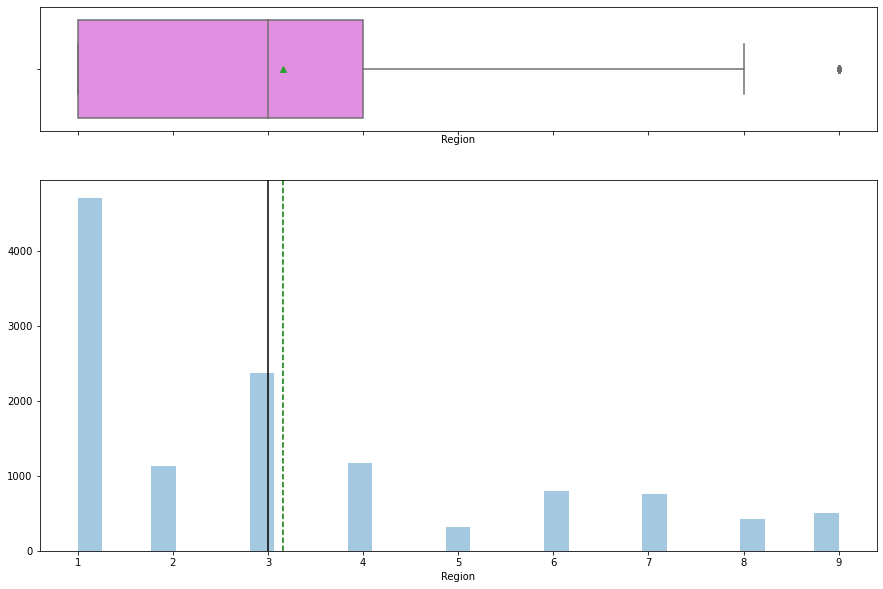

In [ ]:
histogram_boxplot(data["Region"])

* The distribution of Region shows most of the customers accessed the website from Region 1. 
* These values are masked so it is difficult to comment on it.
* The distribution of Region also suggests we should look at it as a category to extract more information.

### Observations on TrafficType

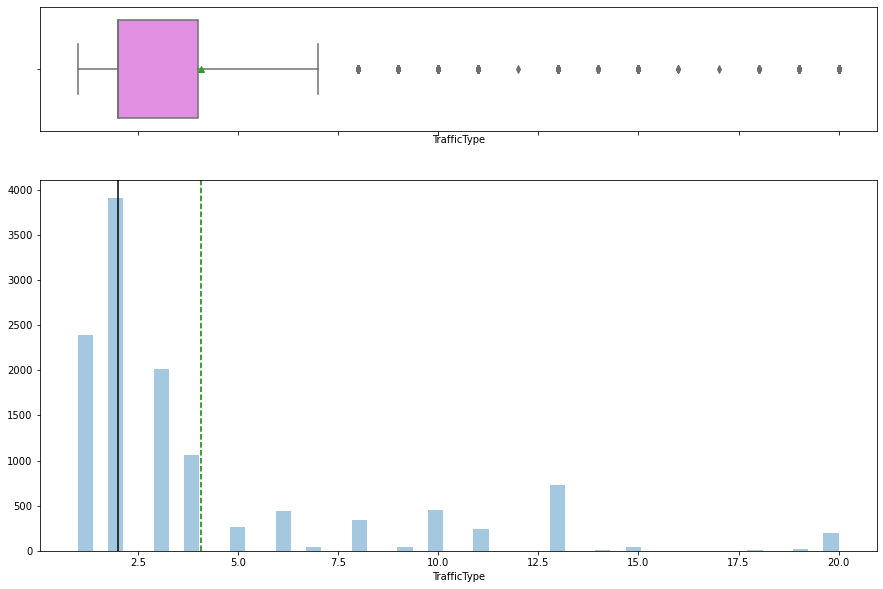

In [ ]:
histogram_boxplot(data["TrafficType"])

* The distribution of TrafficTyoes shows most of types of traffic the website gets is '2. 
* These values are masked so it is difficult to comment on it.
* The distribution of Traffic also suggests we should look at it as a category to extract more information.

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Month

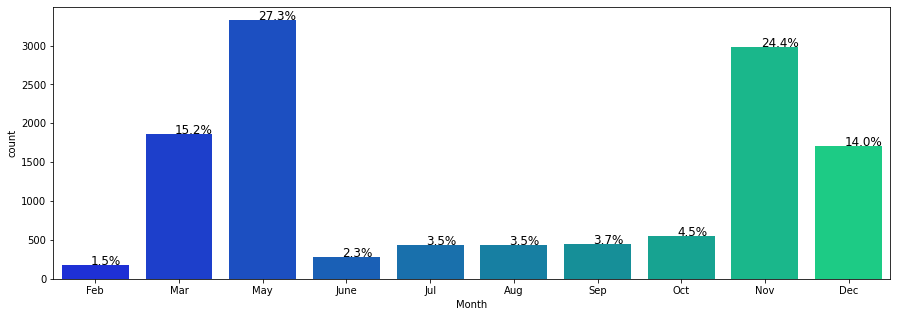

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Month"],palette='winter',order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
perc_on_bar(ax,data["Month"])

* 27.3% of the users visited the website in the month of May followed by November with 24.4% of traffic.

### Observations on VisitorType

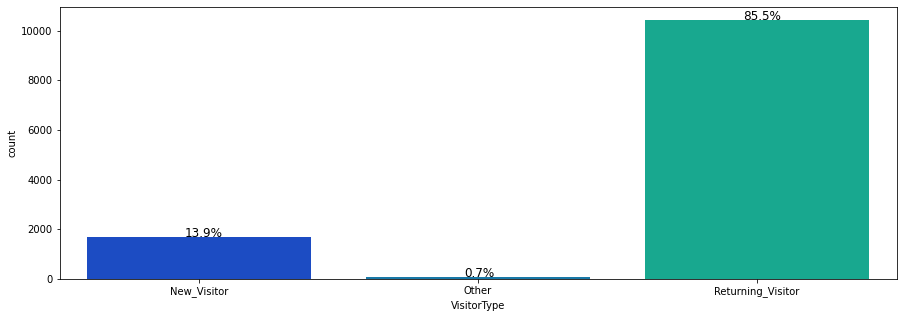

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["VisitorType"],palette='winter')
perc_on_bar(ax,data["VisitorType"])

* 85.5% of the customer are returning customers, indicating the website has a loyal base of customers.
* During these 10 months website also say 13.9% of the customers visiting the website.

### Observations on SpecialDay

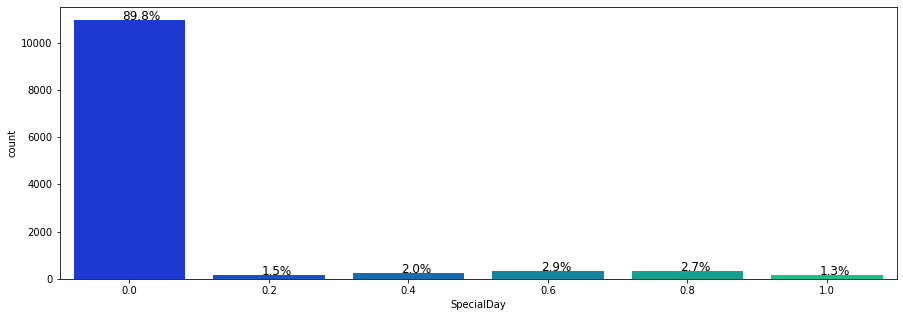

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["SpecialDay"],palette='winter')
perc_on_bar(ax,data["SpecialDay"])

* 89.9% of the website sessions are on Non-Special days.

### Observations on OperatingSystems

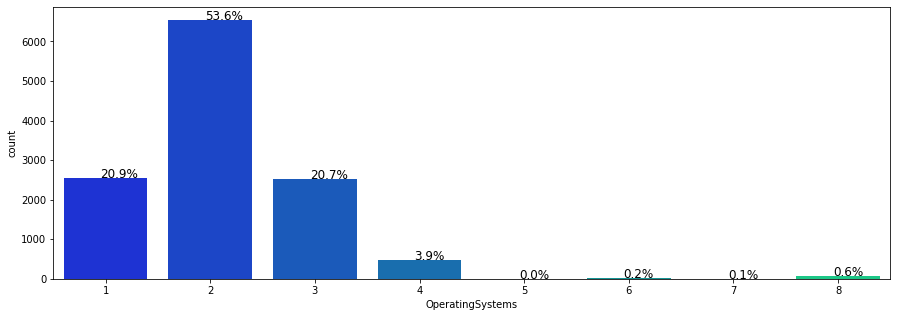

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["OperatingSystems"],palette='winter')
perc_on_bar(ax,data["OperatingSystems"])

* 53.6% of the customers use '2' operating system.

### Observations on Region

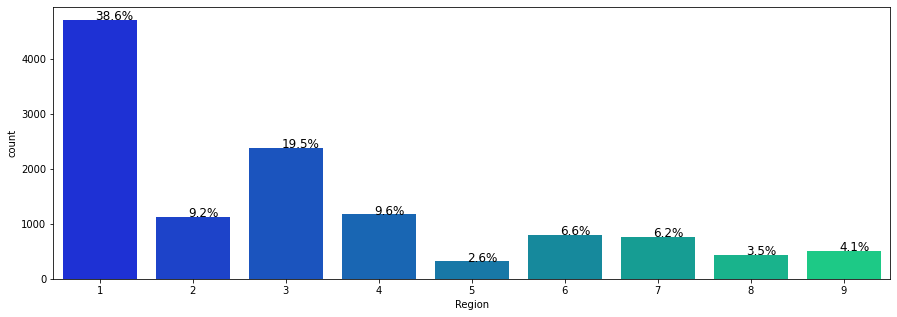

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Region"],palette='winter')
perc_on_bar(ax,data["Region"])

* 38.6% of the website sessions are from customers of Region 1.

### Observations on TrafficType

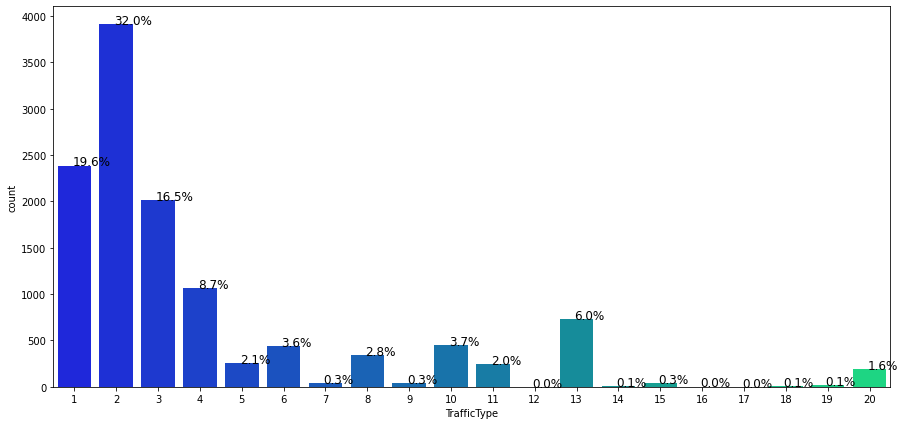

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data["TrafficType"],palette='winter')
perc_on_bar(ax,data["TrafficType"])

* 32% of the traffic on website is of type 2.

### Observations on Weekend

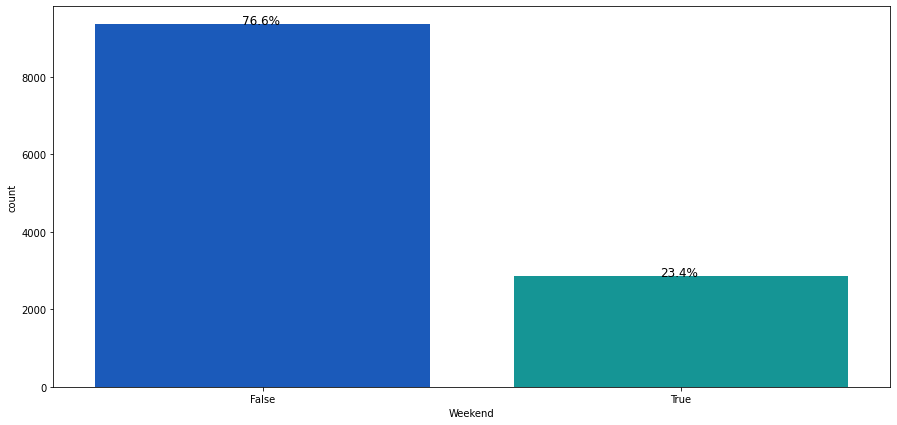

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data["Weekend"],palette='winter')
perc_on_bar(ax,data["Weekend"])

* 76.6% of the website sessions are on Non-weekend days.

### Observations on Revenue

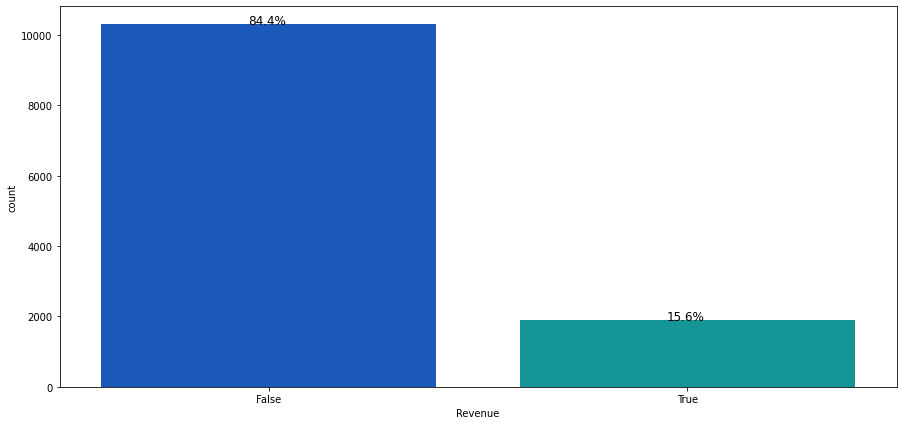

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data["Revenue"],palette='winter')
perc_on_bar(ax,data["Revenue"])

* Website is able to generate revenue from only 15.6% of the customers.

### Observations on Administrative

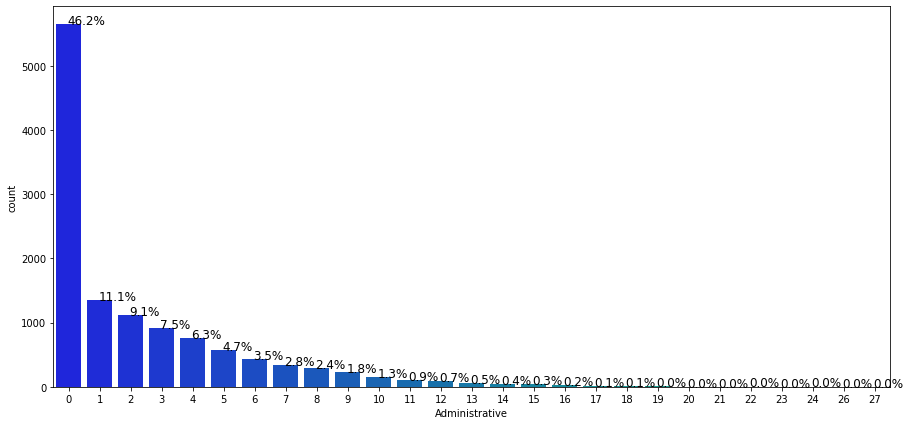

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data["Administrative"],palette='winter')
perc_on_bar(ax,data["Administrative"])

* 46.2% of the customers have not visited the administrative page.

### Observations on Informational

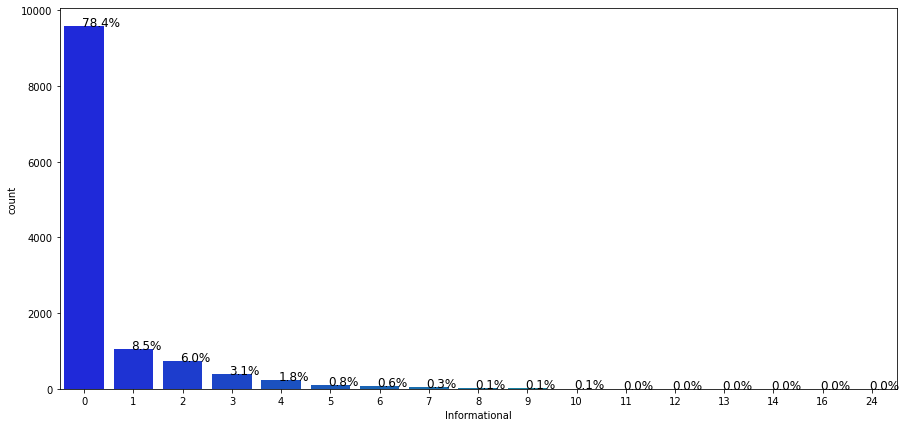

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data["Informational"],palette='winter')
perc_on_bar(ax,data["Informational"])

* 78.4% of the customers have not visited the Informational page.

### Observations on ProductRelated

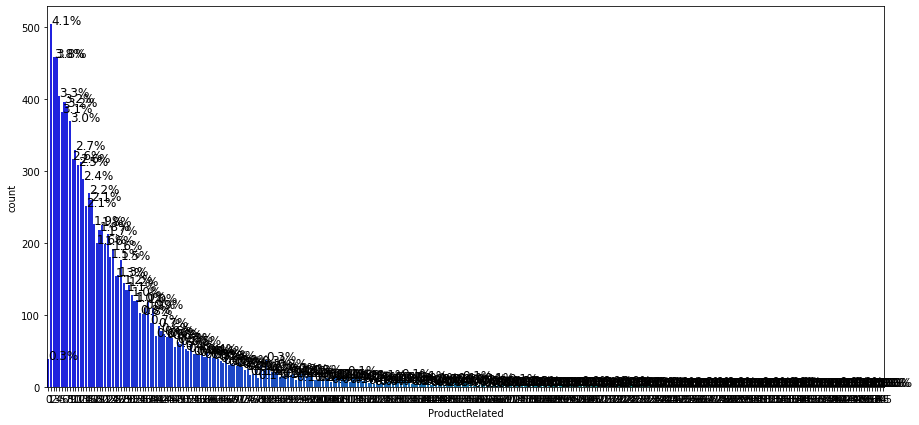

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data["ProductRelated"],palette='winter')
perc_on_bar(ax,data["ProductRelated"])

In [ ]:
(len(data[data["ProductRelated"]==0]["ProductRelated"])/len(data))*100

0.311347808275297

* Only 0.3% of customers have not visited the product related pages.

## Bivariate Analysis

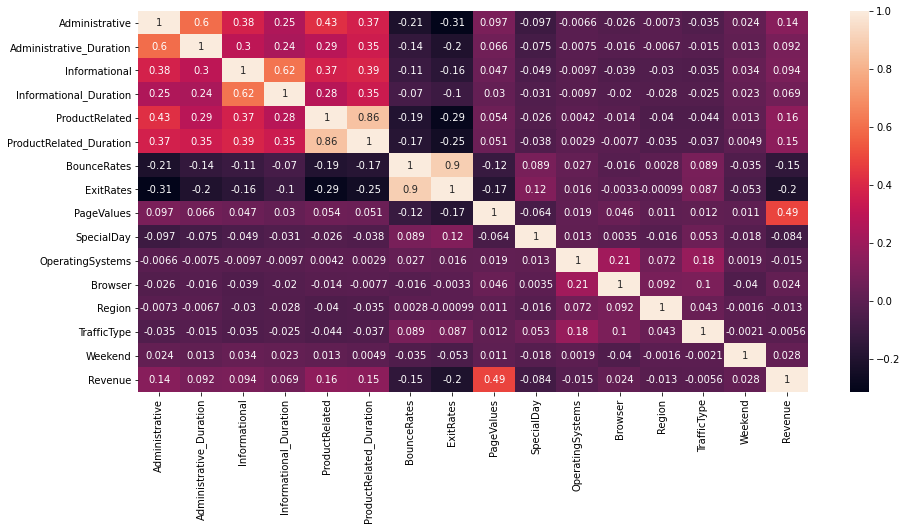

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

* Revenue shows the highest correlation with PageValues (0.49) simply because PageValues takes in account the pages visited before reaching the 'transaction' page.
* Administrative, Informational and ProductRelated pages are correlated with the Administrative, Informational and ProductRelated time durations spent on them which is understandable.
* BounceRates and ExitRates are very highly correlated(0.9) with each other.

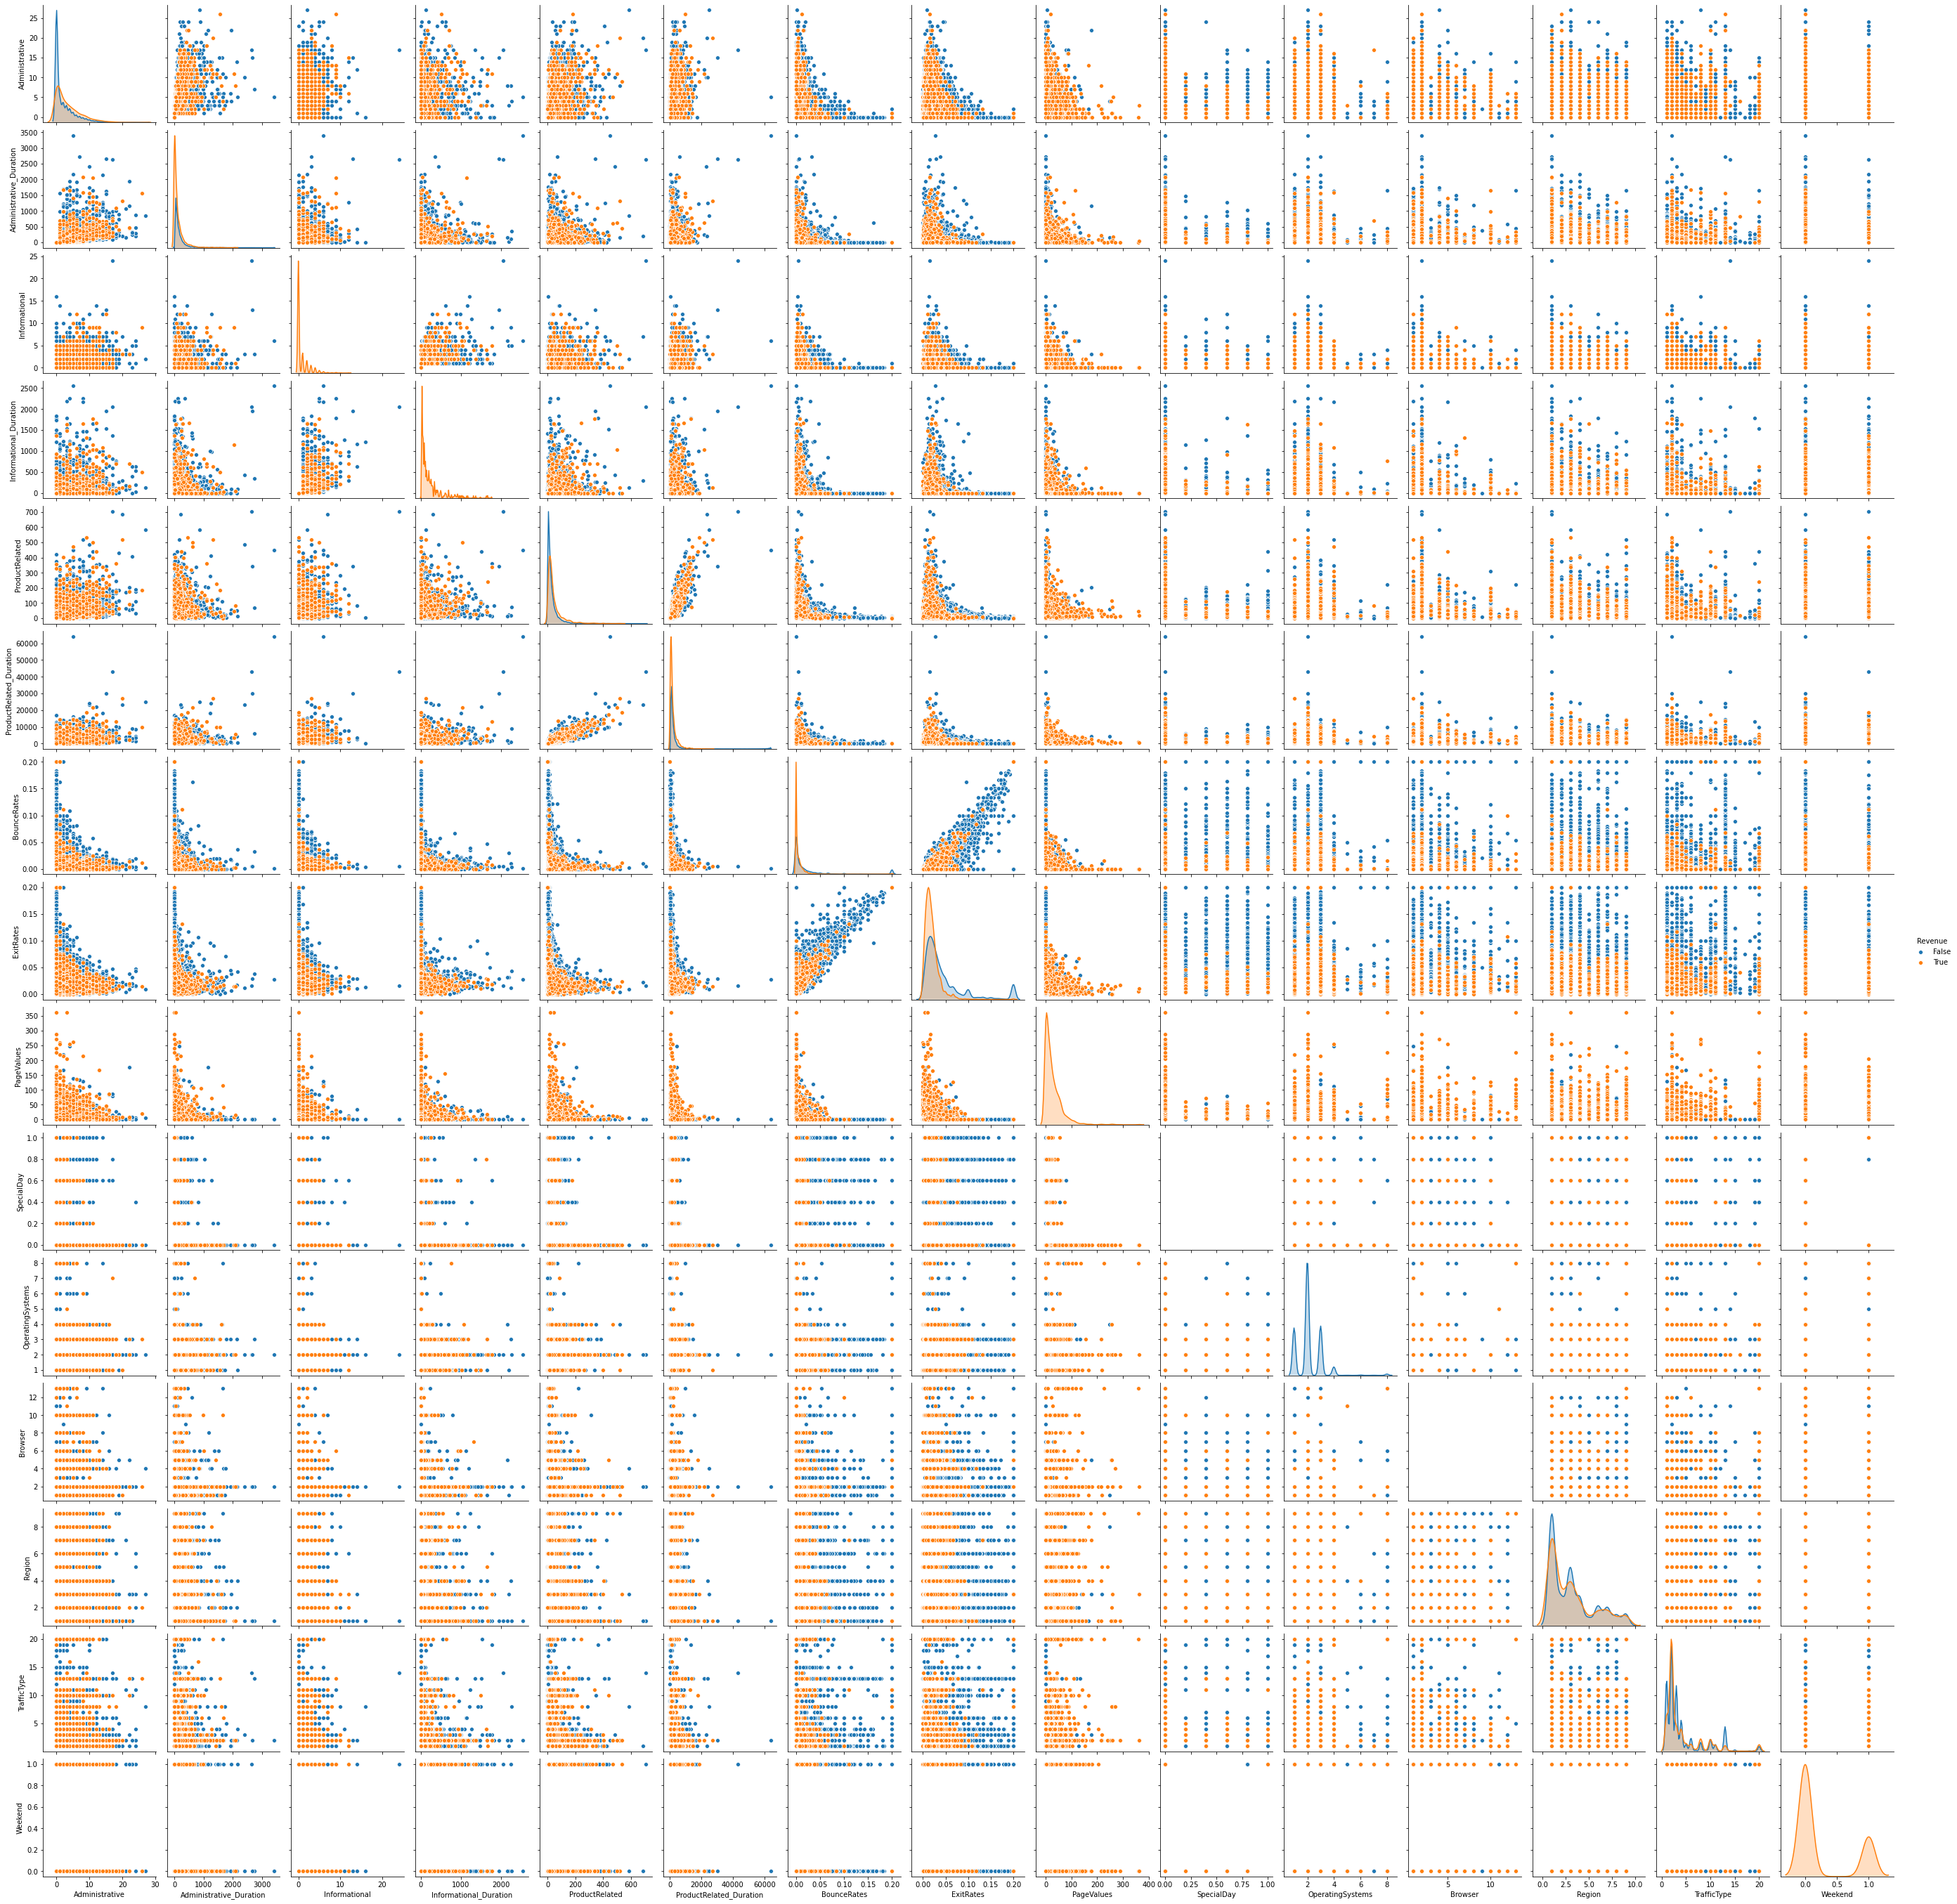

In [ ]:
sns.pairplot(data=data,hue="Revenue",)
plt.show()

* We can see varying distributions in variables for revenue, we should investigate it further.

### Revenue vs Administrative, Informational and ProductRelated pages and time spent on these pages

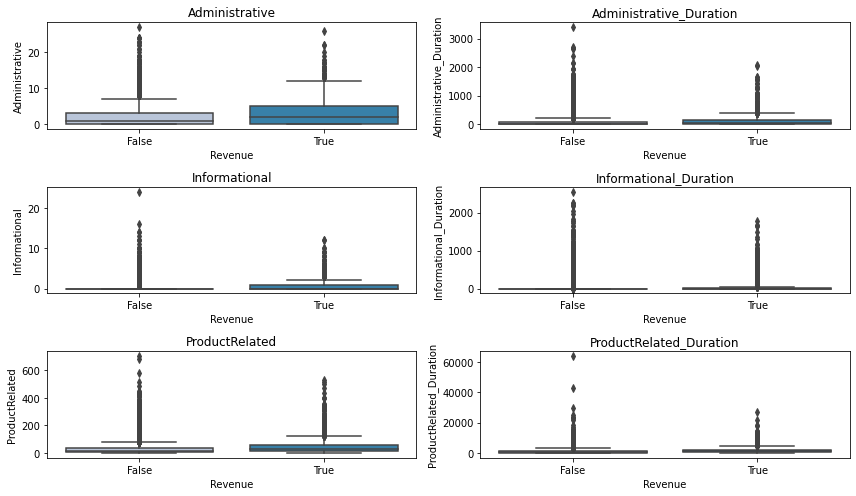

In [ ]:
cols = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Revenue"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**It is difficult to make an interpretation from the graphs above let's visualize them by removing these outliers (for visualization not from orignal data) to get a better understanding**

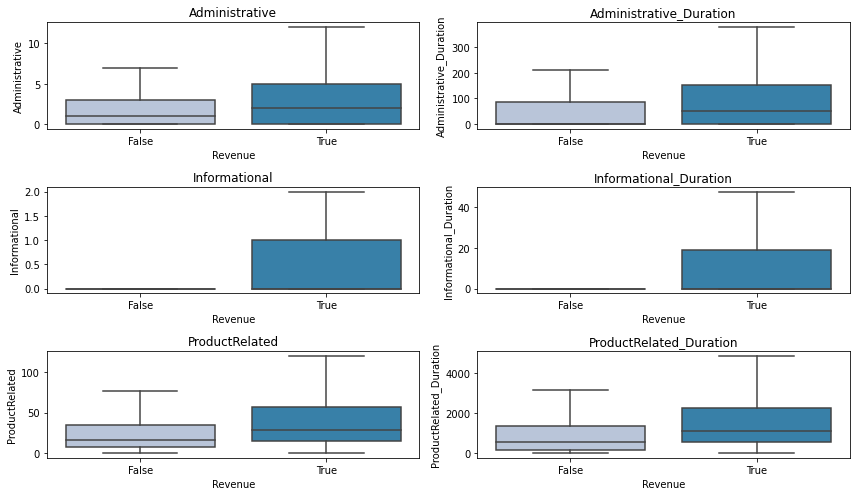

In [ ]:
cols = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Revenue"],data[variable],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Customers who have visited Administrative, Informational and ProductRelated pages more times contribute to the revenue as compared to the one's who visited less pages.
* Those customers who spend more time on the Administrative, Informational and ProductRelated pages help in generating the revenue.
* But in both cases - visiting the page and spending more time on pages have many outliers.
* There is clear distinction between the customers - visiting more pages and spening more time on pages contributes to the revenue.

### Revenue vs Bounce Rates,Exit Rates

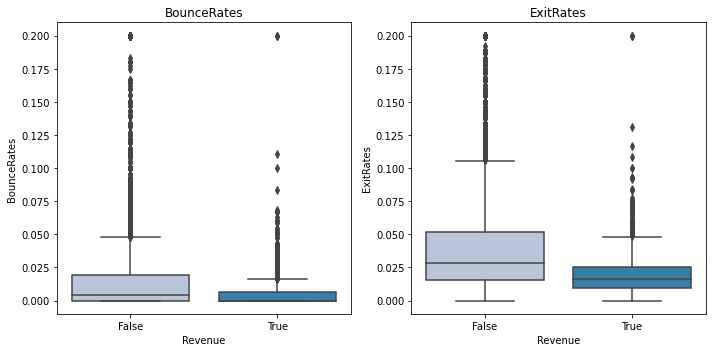

In [ ]:
cols = data[['BounceRates','ExitRates']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(data["Revenue"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


* It is logical that customers who leave the website withouth triggering any response on server(definition of bounce rate) wouldn't be contributing to the revenue, similarly for the exit rates.

### Revenue vs PageValues

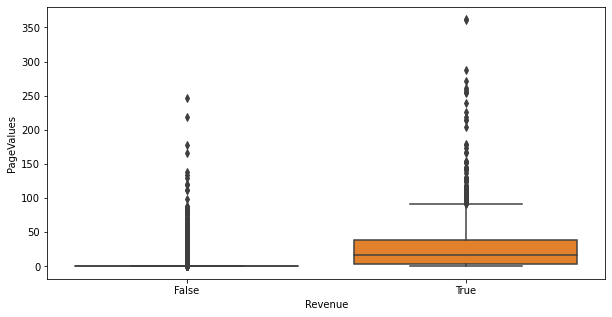

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Revenue'],data['PageValues'])
plt.show()

* Higher PageValues means higher contribution to revenue.

### Revenue vs SpecialDay

In [ ]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Revenue'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Revenue'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Revenue     False  True    All
SpecialDay                    
0.0          9125  1831  10956
0.2           164    14    178
0.4           230    13    243
0.6           321    29    350
0.8           313    11    324
1.0           144    10    154
All         10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


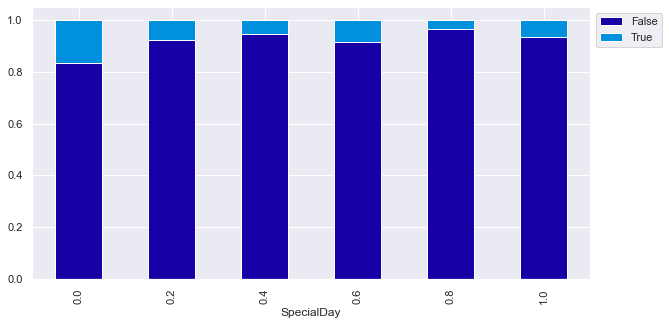

In [ ]:
stacked_plot(data['SpecialDay'])

* Regular days contribute more to the revenue instead of special occasions which is understandable as most days are non-special days, but there are very few conversion sessions on special days.

### Revenue vs Month

Revenue  False  True    All
Month                      
Aug        357    76    433
Dec       1490   216   1706
Feb        178     3    181
Jul        366    66    432
June       256    29    285
Mar       1668   192   1860
May       2964   365   3329
Nov       2222   760   2982
Oct        434   115    549
Sep        362    86    448
All      10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


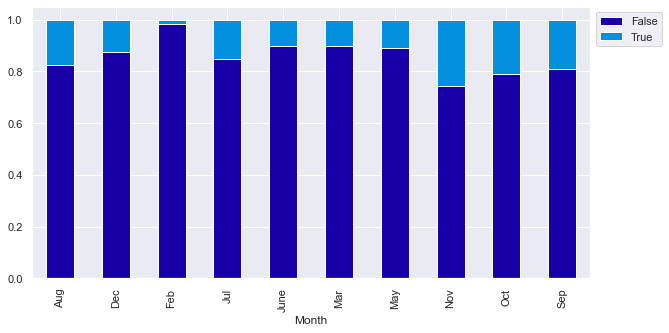

In [ ]:
stacked_plot(data["Month"])

* November and May are the months with largest contributions in the revenue.
* There are lesser sessions in November as compared to May but more conversions.

In [ ]:
revenue_data = data[data['Revenue']==True]
revenue_data.groupby(['Month','SpecialDay'])['Revenue'].count()

Month  SpecialDay
Aug    0.0            76
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
Dec    0.0           216
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
Feb    0.0             1
       0.2             0
       0.4             0
       0.6             0
       0.8             1
       1.0             1
Jul    0.0            66
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
June   0.0            29
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
Mar    0.0           192
       0.2             0
       0.4             0
       0.6             0
       0.8             0
       1.0             0
May    0.0           290
       0.2            14
       0.4            13
       

* Revenue sessions on or around Special day were only observed in May, this means website is not able to capatilize on the special occasions.

### Revenue vs OperatingSystems

Revenue           False  True    All
OperatingSystems                    
1                  2170   379   2549
2                  5386  1155   6541
3                  2262   268   2530
4                   393    85    478
5                     5     1      6
6                    17     2     19
7                     6     1      7
8                    58    17     75
All               10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


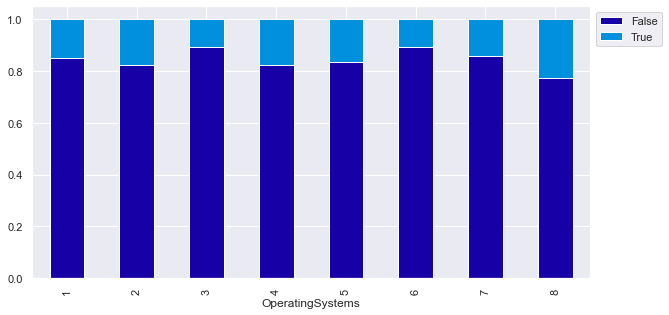

In [ ]:
stacked_plot(data["OperatingSystems"])

* Custoemrs using operating system '2' are the highest contributors to revenue, approximately 20% (1155).

### Revenue vs Browser

Revenue  False  True    All
Browser                    
1         2062   365   2427
2         6660  1223   7883
3          100     5    105
4          601   130    731
5          379    86    465
6          154    20    174
7           43     6     49
8          114    21    135
9            1     0      1
10         131    32    163
11           5     1      6
12           7     3     10
13          40    16     56
All      10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


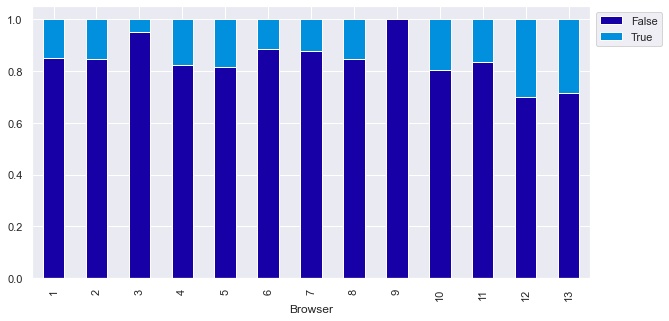

In [ ]:
stacked_plot(data["Browser"])

* Approximately 20%(1223 customers) of cutomers using Browser '2' contribute to the revenue.

### Revenue vs Region

Revenue  False  True    All
Region                     
1         3943   771   4714
2          940   188   1128
3         2030   349   2379
4          996   175   1171
5          266    52    318
6          689   112    801
7          639   119    758
8          375    56    431
9          419    86    505
All      10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


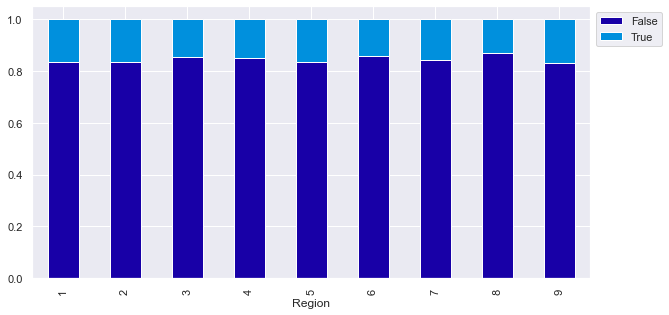

In [ ]:
stacked_plot(data["Region"])

* There is a similar distrbution in regions.

Revenue      False  True    All
TrafficType                    
1             2126   262   2388
2             3064   847   3911
3             1833   180   2013
4              901   165   1066
5              204    56    260
6              390    53    443
7               28    12     40
8              248    95    343
9               37     4     41
10             360    90    450
11             200    47    247
12               1     0      1
13             685    43    728
14              11     2     13
15              37     0     37
16               2     1      3
17               1     0      1
18              10     0     10
19              16     1     17
20             143    50    193
All          10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


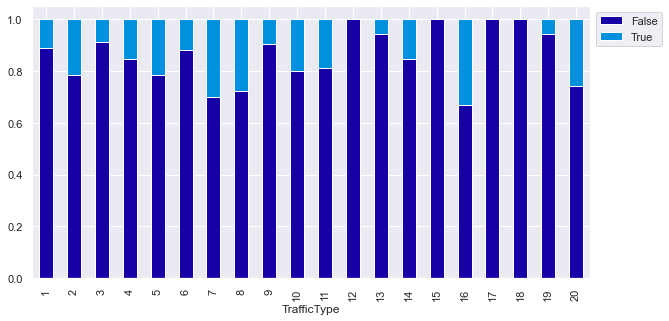

In [ ]:
stacked_plot(data["TrafficType"])

* There is a varying pattern of revenue sessions among different traffic sources, although traffic coming source 2 has the highest proportion of revenue sessions.

### Revenue vs VisitorType

Revenue            False  True    All
VisitorType                          
New_Visitor         1271   422   1693
Other                 65    16     81
Returning_Visitor   8961  1470  10431
All                10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


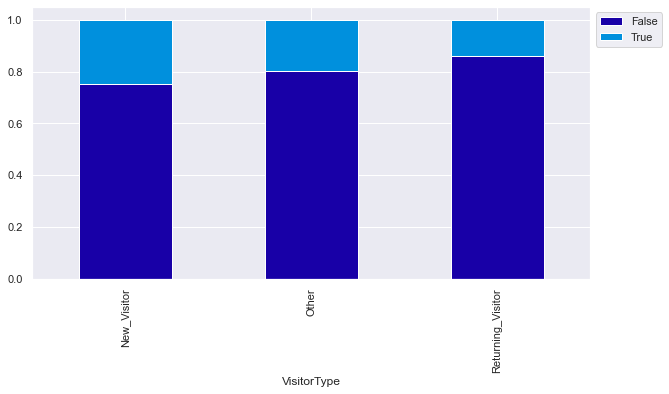

In [ ]:
stacked_plot(data["VisitorType"])

* Returning customers are the largest contributors to the revenue. But interesting New visitors end up having more conversion sessions.

### Revenue vs Weekend

Revenue  False  True    All
Weekend                    
False     7937  1409   9346
True      2360   499   2859
All      10297  1908  12205
------------------------------------------------------------------------------------------------------------------------


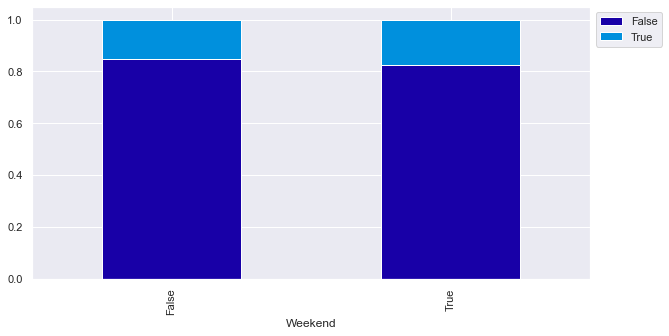

In [ ]:
stacked_plot(data["Weekend"])

* There is not much difference in weekend and week-day sessions.

### Customer-Level Analysis

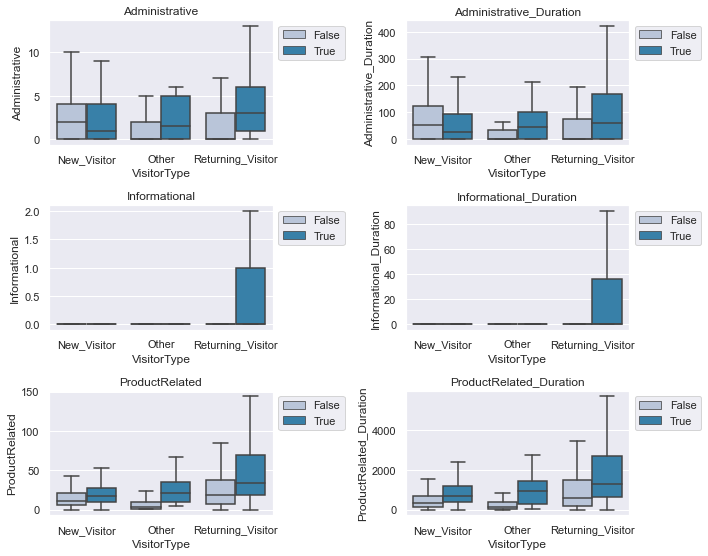

In [ ]:
cols = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(data["VisitorType"],data[variable],hue=data['Revenue'],palette="PuBu", showfliers=False) #turning-off outliers
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

* New visitors who have visited more administrative pages and spent more time on them have not contributed to the revenue - This indicates that the administrative pages need to be user friendly and simplified.
* Returning customers visiting informational pages have contributed to revenue - The informational pages are doing well to provide customers with all the required information.
* ProductRelated pages are doing a fair job.

VisitorType  New_Visitor  Other  Returning_Visitor    All
Month                                                    
Aug                   72      0                361    433
Dec                  334     58               1314   1706
Feb                    1      0                180    181
Jul                   54      0                378    432
June                  30      1                254    285
Mar                  232      0               1628   1860
May                  319      0               3010   3329
Nov                  419     22               2541   2982
Oct                  124      0                425    549
Sep                  108      0                340    448
All                 1693     81              10431  12205
------------------------------------------------------------------------------------------------------------------------


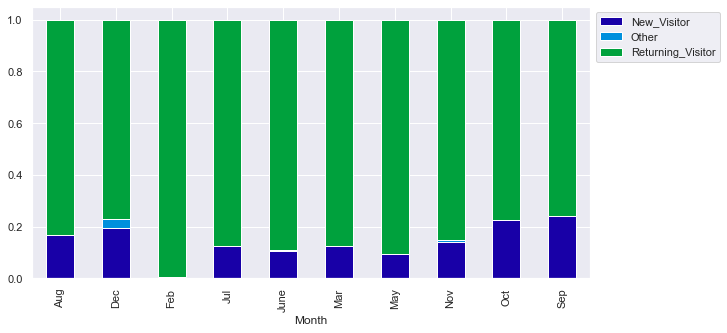

In [ ]:
tab1 = pd.crosstab(data['Month'],data['VisitorType'],margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(data['Month'],data['VisitorType'],normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(10,5))
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

* November and December saw most new customers, but the proportion of new customers to returning customers is highest in October and September.

### Data Preperation

In [16]:
# page values have the information related to the transaction activity of a customer and would create a bias in model.
data = data.drop(['PageValues'],axis=1) 

In [17]:
dummy_data = pd.get_dummies(data, columns=['Month','VisitorType','Weekend','Region','Browser',
                                           'OperatingSystems','SpecialDay'],drop_first=True)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,TrafficType,Revenue,...,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,1,False,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,2,False,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,3,False,...,1,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,4,False,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,4,False,...,0,0,0,0,0,0,0,0,0,0


## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build Naive Bayes model
4. Tune the model if required.
5. Test the data on test set.

In [18]:
column_names = list(dummy_data.columns)
column_names.remove('Revenue')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'TrafficType', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_True', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'SpecialDay_0.2', 'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0']


## Split Data

In [19]:
X = dummy_data.drop('Revenue',axis=1)                           # Features
y = dummy_data['Revenue'].astype('int64')                       # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [20]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(8543, 53) (3662, 53)


## Build Naive Bayes Model

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred  =  classifier.predict(X_test)

In [25]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac = accuracy_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)


array([[ 773, 2301],
       [  49,  539]])